In [8]:
# import datetime
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

# Loading dataset
dfRawFile = pd.read_csv('datagen.csv', sep=',', error_bad_lines=False)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

dfRawFile['label'] = dfRawFile['app_status'].map({'valid': 0, 'invalid': 1})
#dfRawFile['browserType'] = dfRawFile['browser'].map({0: 'edge', 1: 'chrome', 2: 'safari', 3: 'firefox', 4: 'opera', 5: 'vivaldi' })

dfRawFile.drop(['app_id', 'app_status', 'score'], axis=1, inplace=True)
#sns.FacetGrid(dfRawFile, hue="Status", size=8,).map(sns.kdeplot, "IPAddress",shade=True).add_legend()

In [10]:
dfEnriched = dfRawFile.copy()
dfEnriched.sample(10)

,ipAddress,ipHop,timeSubmitSec,browser,package,inList,inCust,weekDay,appHour,label
2086,21538.0,0.0,22.0,2.0,12.0,0.0,1,4.0,12.0,0
1897,18461.0,0.0,19.0,3.0,0.0,0.0,0,6.0,8.0,0
6263,0.0,0.0,19.0,1.0,0.0,0.0,1,6.0,9.0,0
3736,15384.0,0.0,20.0,2.0,3.0,0.0,1,6.0,9.0,0
4009,12307.0,0.0,19.0,1.0,6.0,0.0,0,5.0,11.0,0
6237,15384.0,0.0,20.0,1.0,3.0,0.0,0,5.0,8.0,0
1263,6153.0,0.0,20.0,2.0,6.0,0.0,0,4.0,11.0,0
2895,12307.0,0.0,21.0,2.0,3.0,0.0,0,5.0,9.0,0
7327,21538.0,1.0,17.0,0.0,3.0,0.0,0,6.0,6.0,0
6572,12307.0,0.0,21.0,1.0,0.0,1.0,0,3.0,9.0,0


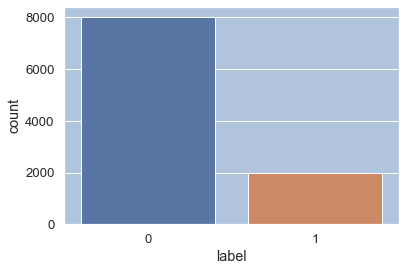

In [11]:
from seaborn import axes_style
sns.set(font_scale=1.2)
with axes_style({'axes.facecolor': 'lightsteelblue', 'grid.color': 'white'}):
    sns.countplot(data=dfEnriched, x='label')
    #add percentage

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (7).

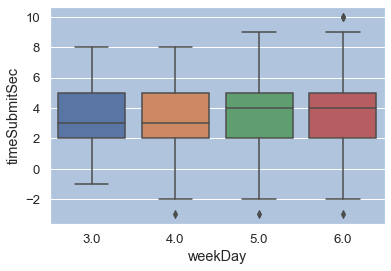

In [12]:
from seaborn import axes_style
sns.set(font_scale=1.2)
with axes_style({'axes.facecolor': 'lightsteelblue', 'grid.color': 'white'}):
    plt.figure()
    sns.set_context({"figure.figsize": (15, 7)})
    xDayLabels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    g = sns.boxplot(data=dfEnriched.loc[dfEnriched.label == 1,:], x = 'weekDay', y = 'timeSubmitSec')
    g.set_xticklabels(xDayLabels, rotation=30)
    plt.title("Distribution of Invalid Transaction by WeekDays", fontsize=20)


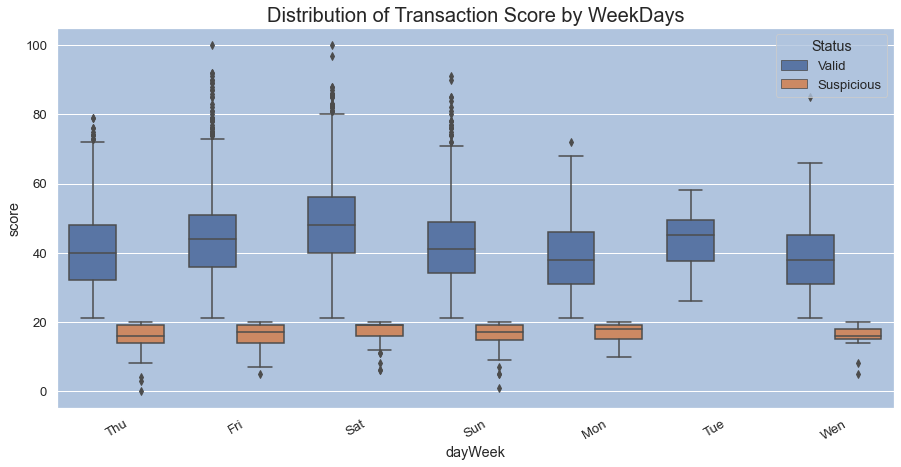

In [38]:
from seaborn import axes_style
sns.set(font_scale=1.2)
with axes_style({'axes.facecolor': 'lightsteelblue', 'grid.color': 'white'}):
    sns.set_context({"figure.figsize": (15, 7)})
    xDayLabels = ['Thu','Fri','Sat','Sun','Mon','Tue','Wen']
    g = sns.boxplot(data = dfEnriched, x = 'dayWeek', y = 'score', hue = 'Status')
    g.set_xticklabels(xDayLabels, rotation=30)
    plt.title("Distribution of Transaction Score by WeekDays", fontsize=20)

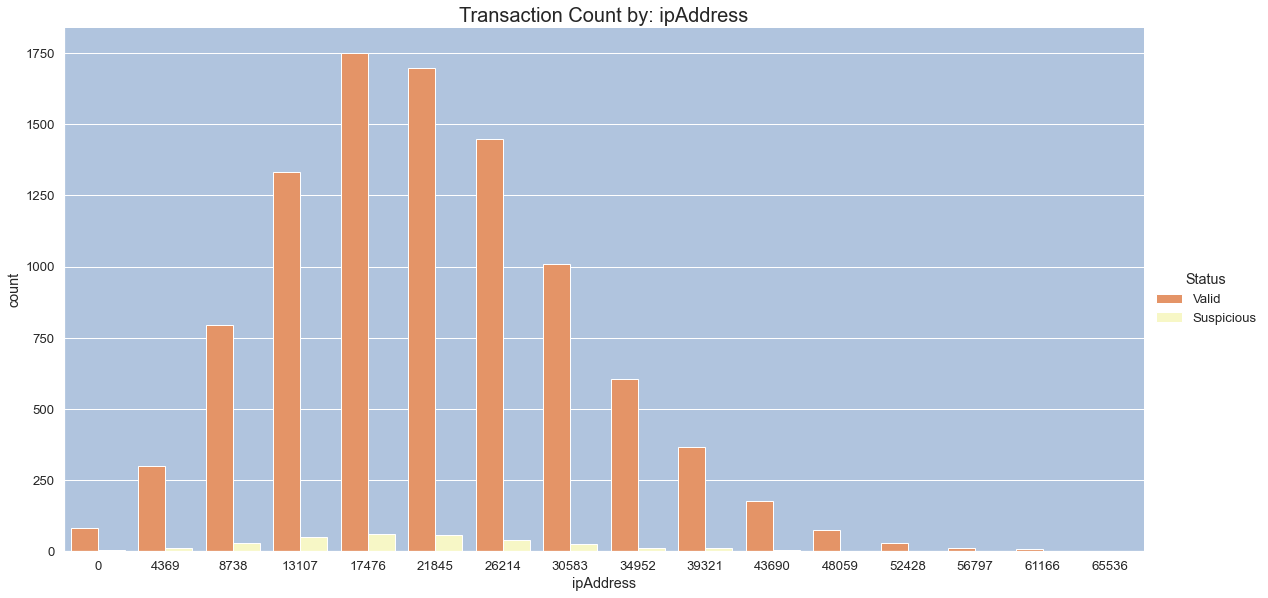

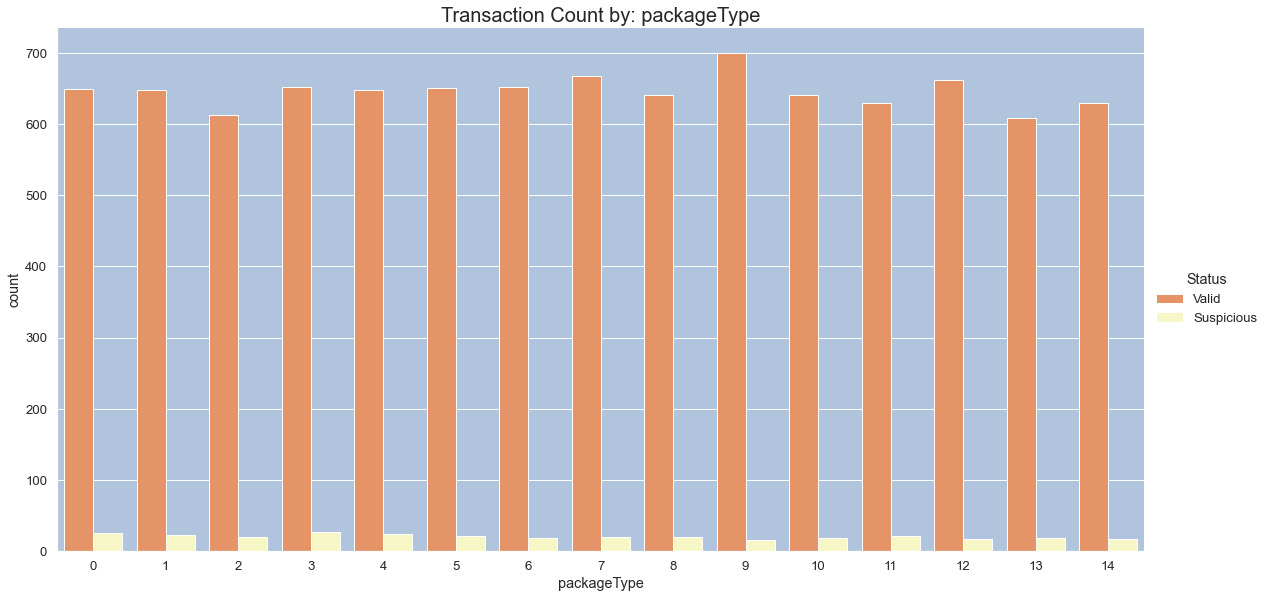

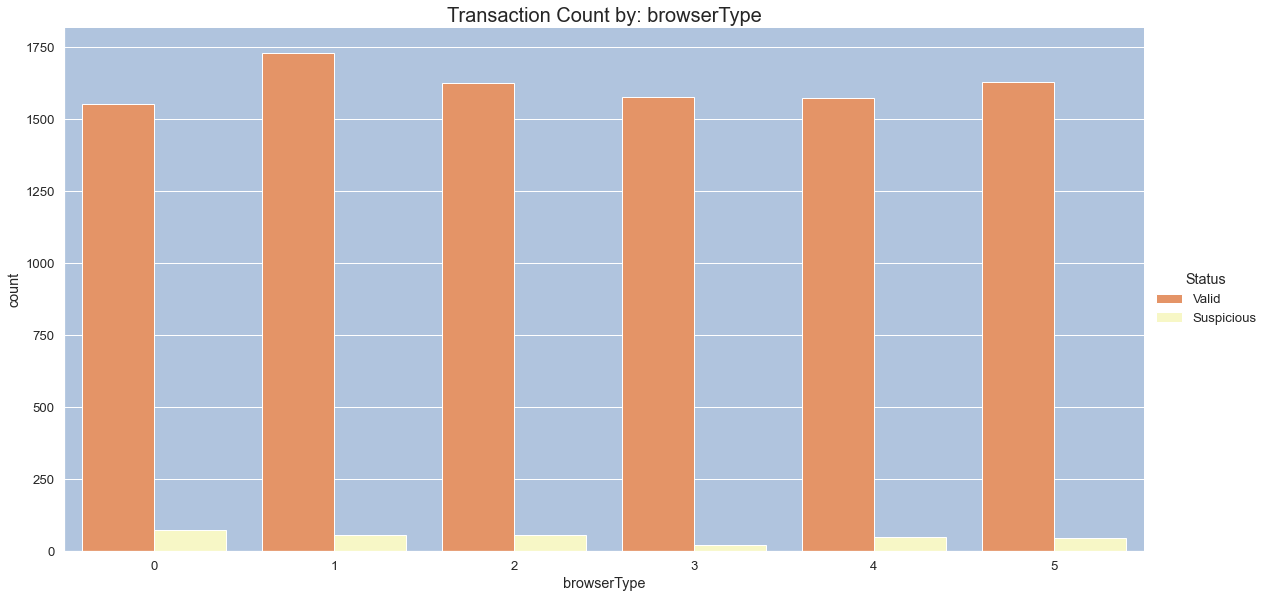

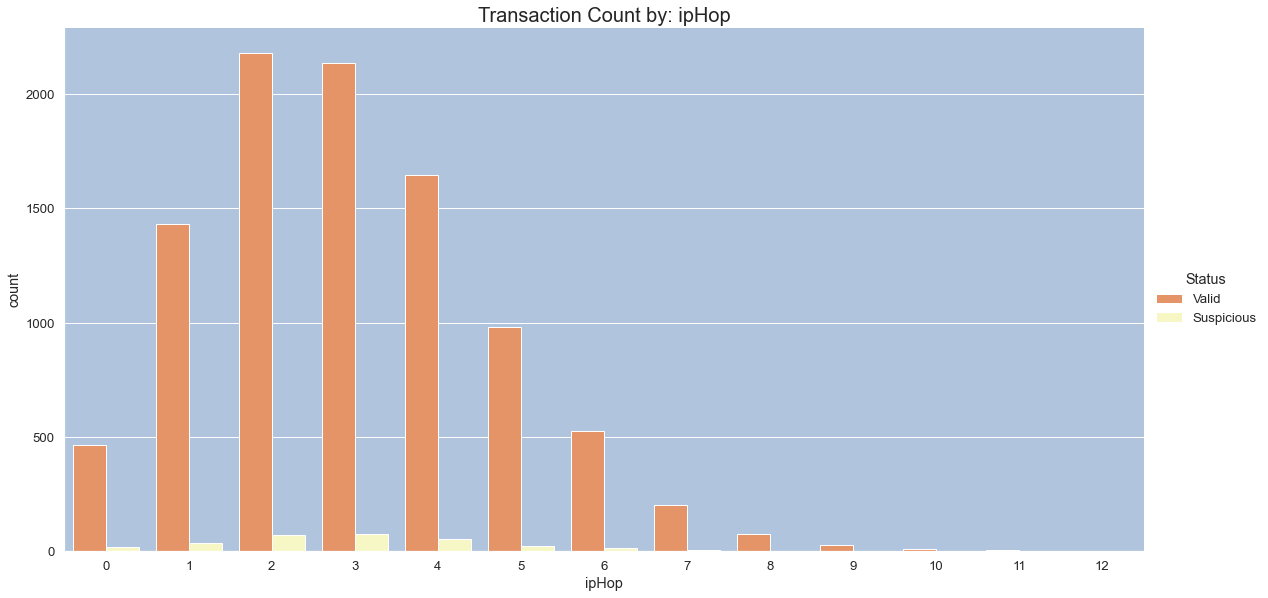

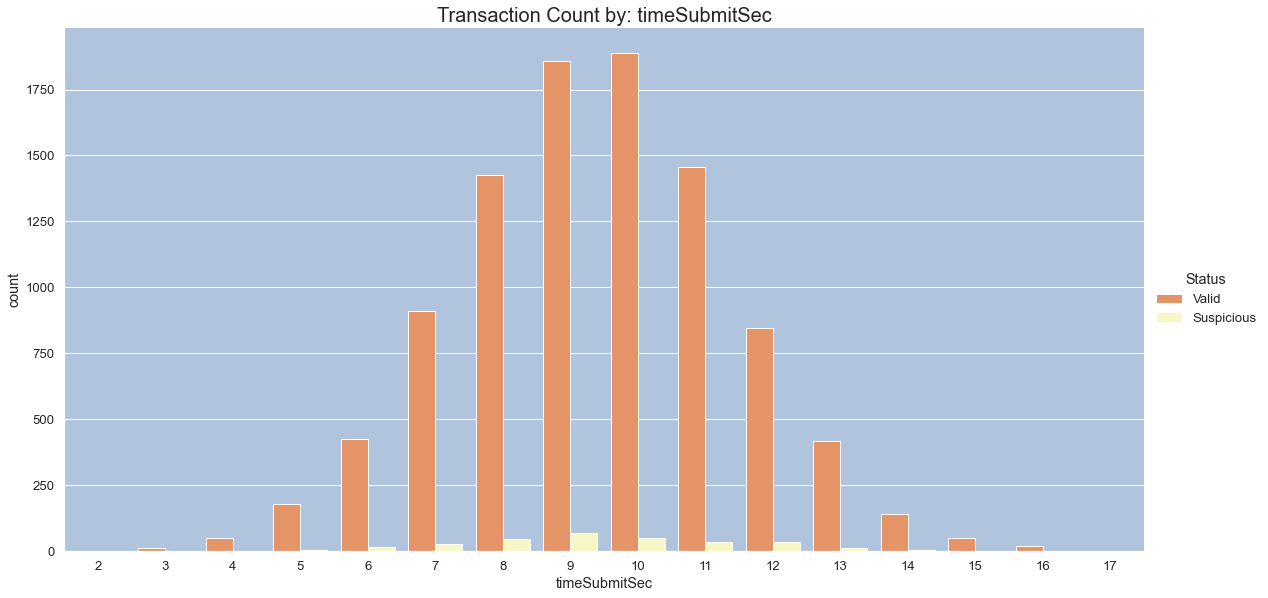

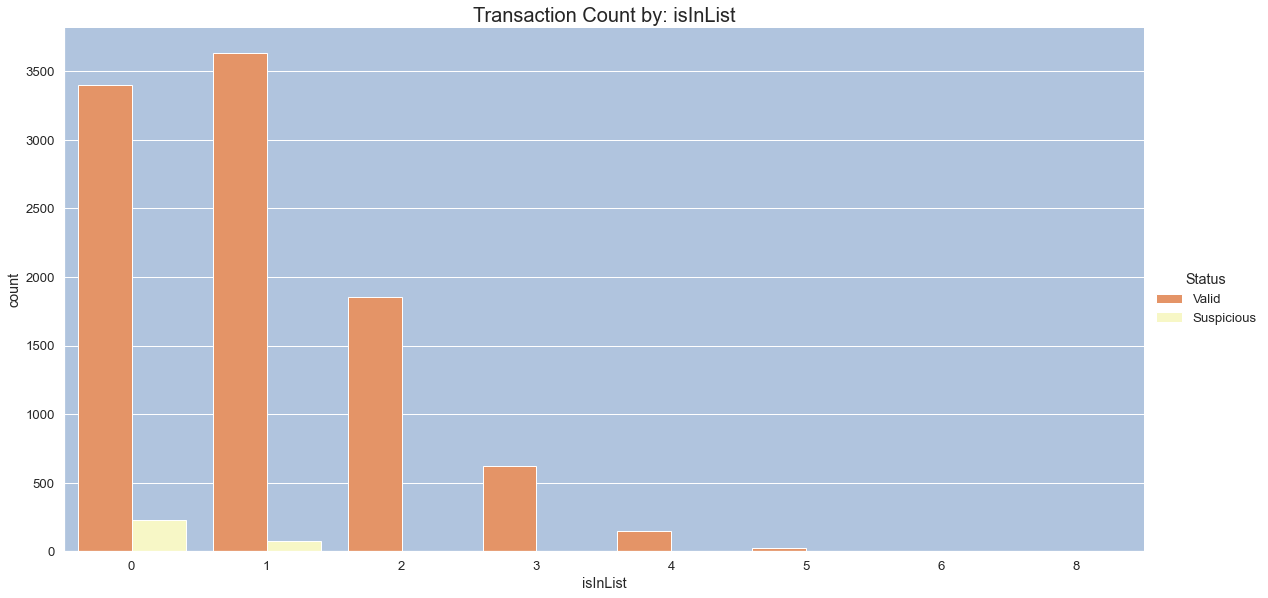

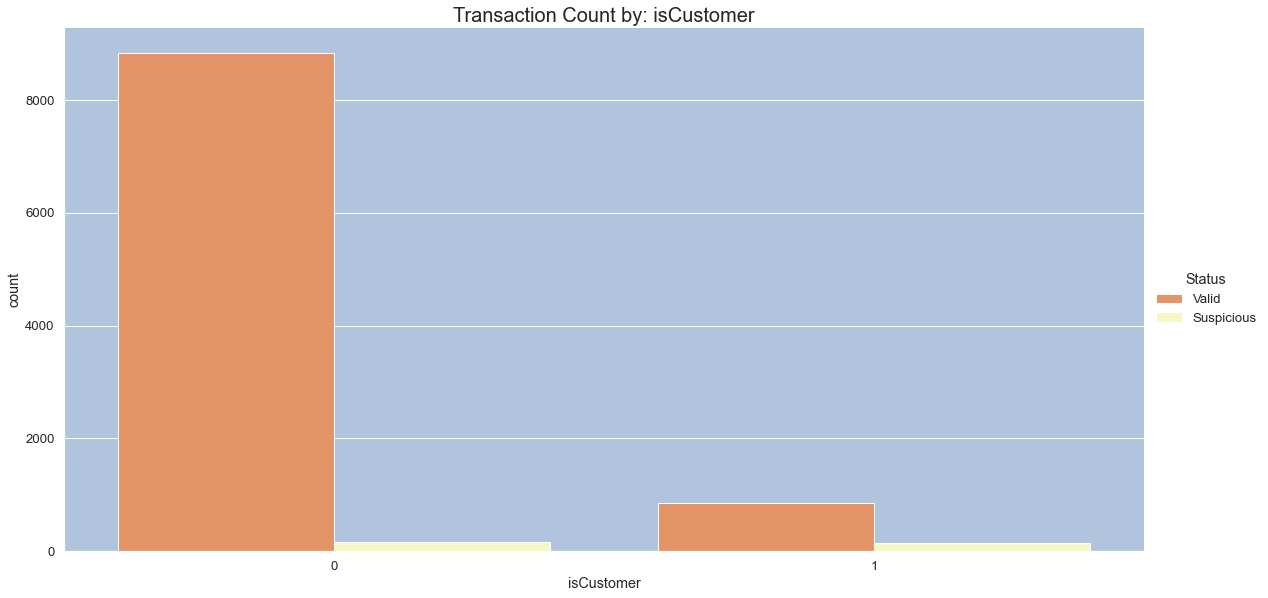

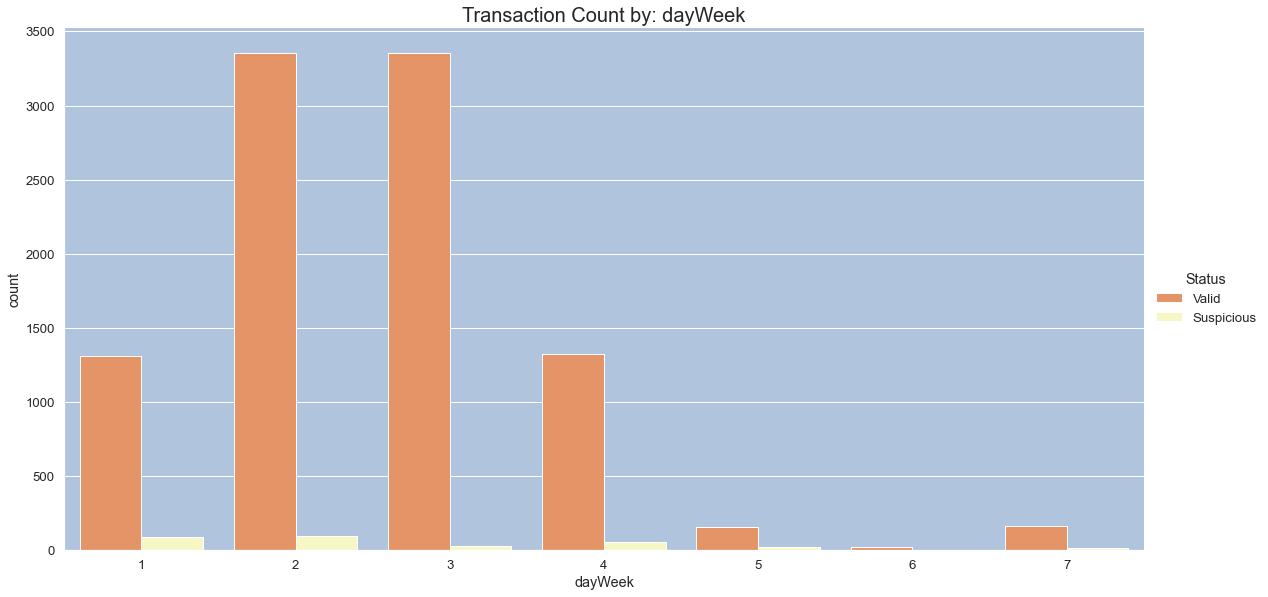

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import axes_style
features = dfEnriched.columns[0:8]
sns.set(font_scale=1.2)
with axes_style({'axes.facecolor': 'lightsteelblue', 'grid.color': 'white'}):
    
    for i, col in enumerate(dfEnriched[features]):     
        colours = sns.color_palette("Spectral", 3)
        #fig= fig.figure(figsize=(15, 10))

        sns.catplot(data=dfEnriched, x=col ,kind="count",hue = "Status",palette=colours, height=8,aspect =2)   

        plt.xlabel(col)
        plt.title('Transaction Count by: ' + str(col),fontsize=20)
   
    

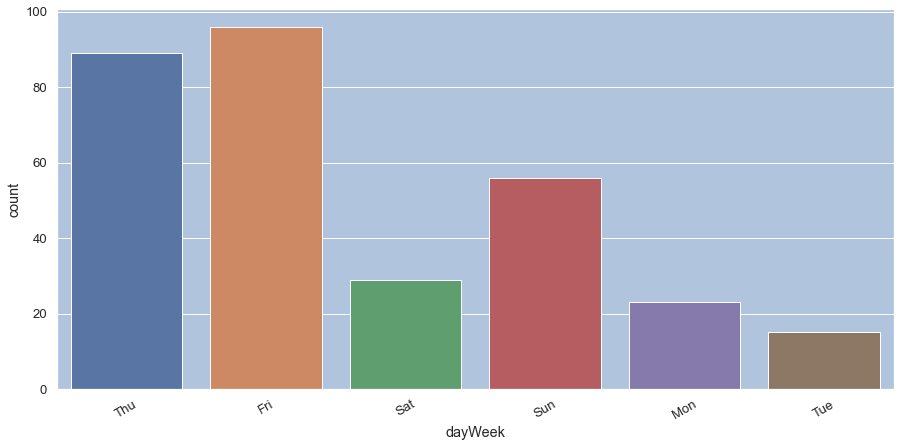

In [44]:
from seaborn import axes_style
sns.set(font_scale=1.2)
with axes_style({'axes.facecolor': 'lightsteelblue', 'grid.color': 'white'}):
    #colours = sns.color_palette("Spectral", dfRawFile['IsCustomer'].nunique())
    fig, ax = plt.subplots(figsize=(15,7))
    ax = sns.countplot(x='dayWeek', data=dfEnriched.loc[dfEnriched.Status == 'Suspicious',:], ax=ax)
    ax.set_xticklabels(dfRawFile['dayWeek'].unique(), rotation=30)
    ax.set_xticklabels(['Thu','Fri','Sat','Sun','Mon','Tue','Wen'], rotation=30)
    #ax.annotate('{:,}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    del fig, ax